# Projeto Final de Supercomputação
    
Aluno: Leonardo Malta

Prof: Luciano Soares

## Objetivo

Análise de Eficiência de um algorítimo utilizando uma mesma implementação de uma busca local para o problema do Caixeiro Viajante, de forma sequencial, paralelizada e utilizando GPU.


## Import de Bibliotecas

In [26]:
# Compile C++ code using Python
import os
import sys
import subprocess
from subprocess import Popen, PIPE
import numpy as np
import matplotlib as plt
import time


## Compilando as Implementações

In [9]:
# Compile C++ busca local normal code
subprocess.call(["g++", "-std=c++11", "-o", "busca-local/exec", "busca-local/main.cpp"])

# Compile C++ busca local com openmp
subprocess.call(["g++", "-std=c++11", "-fopenmp", "-o", "busca-local-openmp/exec", "busca-local-openmp/main.cpp"])

# Compile C++ busca local com CUDA
subprocess.call(["nvcc", "-arch=sm_70", "-std=c++14", "-o", "busca-local-gpu/exec", "busca-local-gpu/main.cu"])

0

## Rodando os executáveis e Guardando os Tempos

In [71]:
def run(exec_path, entry):
    """Function to run C++ code, saving time and printing output"""
    start = time.perf_counter()
    str_path = "./" + exec_path
    str_entry = "< " + entry
    # print(str_path + " " + str_entry)
    process = Popen(str_path + " " + str_entry, stdout=PIPE, stderr=PIPE, shell=True)
    stdout, stderr = process.communicate()
    #print(stderr.decode('utf-8'))
    #print(stdout.decode('utf-8'))
    end = time.perf_counter()
    total_time = end - start
    return total_time

# run("busca-local/exec", f"entradas/in-{0}.txt")

In [76]:
buscal_local = []
buscal_local_openmp = []
buscal_local_gpu = []
last_test = 50

for i in range(0, last_test):
    buscal_local.append(run("busca-local/exec", f"entradas/in-{i}.txt"))
    buscal_local_openmp.append(run("busca-local-openmp/exec", f"entradas/in-{i}.txt"))
    buscal_local_gpu.append(run("busca-local-gpu/exec", f"entradas/in-{i}.txt"))



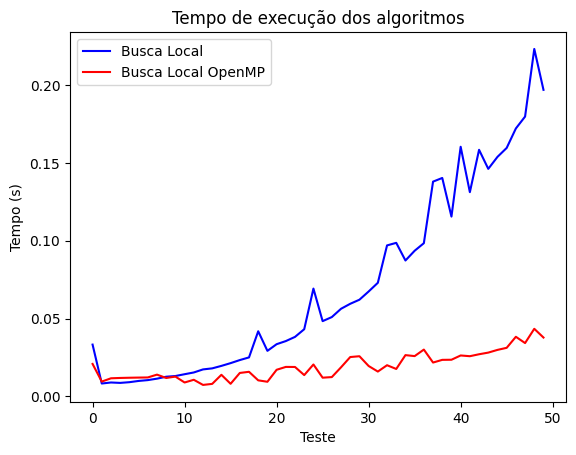

In [77]:
# Plot results
plt.plot(buscal_local, label="Busca Local", color="blue")
plt.plot(buscal_local_openmp, label="Busca Local OpenMP", color="red")
# plt.plot(buscal_local_gpu, label="Busca Local GPU", color="green")
plt.legend()
plt.xlabel("Teste")
plt.ylabel("Tempo (s)")
plt.title("Tempo de execução dos algoritmos")
plt.show()